In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob


In [3]:
from keras.layers import Conv2D, MaxPool2D, Dropout,Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [4]:

# CNN Model
model=Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3),activation= 'relu', input_shape=(224,224,3)))

model.add(Conv2D(filters=32, kernel_size=(3,3),activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)      

In [5]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy,metrics=['accuracy'])


In [6]:
def preprocessingImages1(path):
  """
  input: path
  output: preprocessed images
  """
  image_data=ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)
  image = image_data.flow_from_directory(directory= path, target_size=(224,224),batch_size=32, class_mode='binary')

  return image


In [7]:
path= "C:/Users/aliha/Desktop/FYP/Project/train"
train_data = preprocessingImages1(path)

Found 9605 images belonging to 2 classes.


In [8]:
def preprocessingImages2(path):
  """
  input: path
  output: preprocessed images
  """
  image_data=ImageDataGenerator( rescale=1/255)
  image=image_data.flow_from_directory(directory= path, target_size=(224,224),batch_size=32, class_mode='binary')

  return a


In [9]:
path = "C:/Users/aliha/Desktop/FYP/Project/test"
test_data= preprocessingImages2(path)

Found 1000 images belonging to 2 classes.


In [10]:
# validation data
def preprocessingImages3(path):
  """
  input: path
  output: preprocessed images
  """
  image_data=ImageDataGenerator( rescale=1/255)
  image=image_data.flow_from_directory(directory= path, target_size=(224,224),batch_size=32, class_mode='binary')

  return image


In [11]:
path = "C:/Users/aliha/Desktop/FYP/Project/test"
val_data= preprocessingImages3(path)

Found 1000 images belonging to 2 classes.


In [12]:
#Early stopping to avoid extra epochs
from keras.callbacks import ModelCheckpoint, EarlyStopping

#Early Stopping
ES = EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=5, verbose=1, mode='auto')
 # for better performance you can increase patience value from 3 to 5 or any other higher value
#Model Checkpoint
MC = ModelCheckpoint(monitor='val_accuracy',filepath="./bestmodel.h5", verbose=1, save_best_only=True, mode='auto')

# CallBacks
CD= [ES, MC]

In [13]:
# Model Training

hstry=model.fit_generator(generator=train_data,
                          steps_per_epoch=8,
                          epochs=30, verbose=1,
                          validation_data=val_data,
                          validation_steps=16, callbacks=CD)


Epoch 1/30


8/8 [==============================] - ETA: 0s - loss: 0.7677 - accuracy: 0.5469
Epoch 1: val_accuracy improved from -inf to 0.70312, saving model to .\bestmodel.h5
8/8 [==============================] - 21s 2s/step - loss: 0.7677 - accuracy: 0.5469 - val_loss: 0.6346 - val_accuracy: 0.7031
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.6504 - accuracy: 0.6680
Epoch 2: val_accuracy did not improve from 0.70312
8/8 [==============================] - 17s 2s/step - loss: 0.6504 - accuracy: 0.6680 - val_loss: 0.5664 - val_accuracy: 0.6543
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.5616 - accuracy: 0.6987
Epoch 3: val_accuracy improved from 0.70312 to 0.81836, saving model to .\bestmodel.h5
8/8 [==============================] - 16s 2s/step - loss: 0.5616 - accuracy: 0.6987 - val_loss: 0.4182 - val_accuracy: 0.8184
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.5088 - accuracy: 0.7500
Epoch 4: val_accuracy did n

In [14]:
# Model training and validation history
h=hstry.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

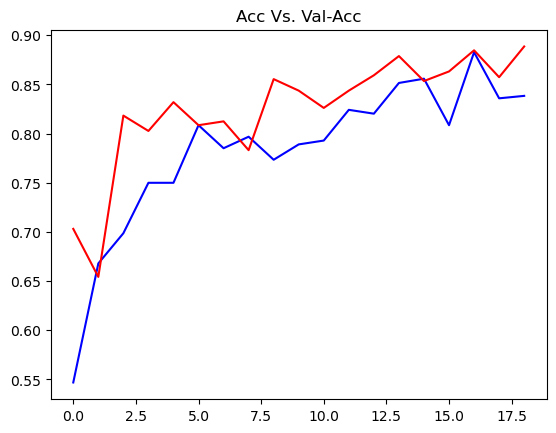

In [15]:
# Model Evaluation Metrics Graphical Presentation
import matplotlib.pyplot as plt

plt.plot(h['accuracy'], c='blue')
plt.plot(h['val_accuracy'], c='red')
plt.title("Acc Vs. Val-Acc")
plt.show()

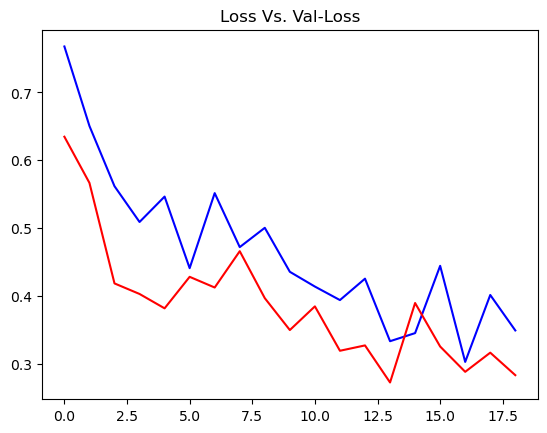

In [16]:
plt.plot(h['loss'], c='blue')
plt.plot(h['val_loss'], c='red')
plt.title("Loss Vs. Val-Loss")
plt.show()

In [28]:
acc= modelTrained.evaluate_generator(test_data)[1]
print(f"Accuracy of our trained model on test data is {acc*100}%")

Accuracy of our trained model on test data is 88.99999856948853%


In [27]:
from keras.models import load_model

modelTrained = load_model("C:/Users/aliha/Desktop/FYP/Project/bestmodel.h5")


In [18]:
acc= model.evaluate(test_data)[1]
print(f"Accuracy of our trained model on test data is {acc*100}%")

32/32 [==============================] - 11s 342ms/step - loss: 0.2935 - accuracy: 0.8900
Accuracy of our trained model on test data is 88.99999856948853%


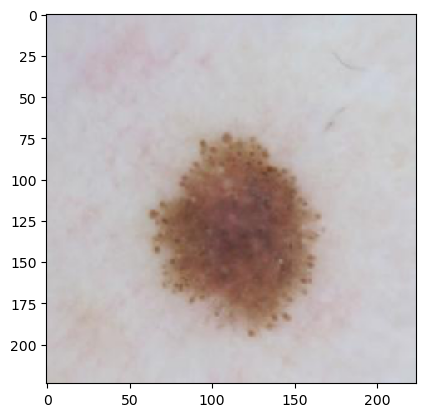

1/1 [==============================] - 0s 240ms/step
The image is malignant i.e Cancer


In [19]:
## benign image : not harmful  Class=0
from keras.preprocessing.image import load_img, img_to_array
path_img = "C:/Users/aliha/Desktop/FYP/Project/test/malignant/melanoma_10172.jpg"
img= load_img(path_img, target_size= (224,224))

input_Array= img_to_array(img)/255
plt.imshow(input_Array)
plt.show()

input_Array.shape
input_ArrayE= np.expand_dims(input_Array, 0)
pred= model.predict(input_ArrayE)
#pred
#pred= modelTrained.predict(input_Array)
predClass = np.where(pred > 0.5, 1,0)
#predClass[0][0]
if predClass[0][0] != 0:
#   print("The image is benign i.e No-Cancer")
    print("The image is malignant i.e Cancer")
else:
#   print("The image is malignant i.e Cancer")
    print("The image is benign i.e No-Cancer")

In [30]:
import cv2
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# Load the trained model for tumor detection
# Replace 'your_model_path.h5' with the actual path to your trained model file
model = load_model('C:/Users/aliha/Desktop/FYP/Project/bestmodel.h5')

# Open the camera (change the index if necessary, e.g., 0 for the built-in camera)
camera = cv2.VideoCapture(1)

# Check if the camera is opened successfully
if not camera.isOpened():
    print("Error: Could not open camera.")
    exit()

while True:
    # Read a frame from the camera
    ret, frame = camera.read()

    # Check if the frame is successfully read
    if not ret:
        print("Error: Failed to capture frame.")
        break

    # Preprocess the frame for model prediction
    frame = cv2.resize(frame, (224, 224))
    input_array = img_to_array(frame) / 255.0
    input_array = np.expand_dims(input_array, axis=0)

    # Predict the class
    prediction = model.predict(input_array)
    pred_class = np.argmax(prediction)

    # Display the result on the frame
    if pred_class == 0:
        cv2.putText(frame, "Malignant", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    else:
        cv2.putText(frame, "Benign", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('Tumor Detection', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close the window
camera.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 50ms/step


Tumor Position for Biopsy (x, y): (173, 157)
